In [432]:
import ROOT
import ctypes
import math

In [433]:
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_bkg/'

loc_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# loc_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
loc_uubar = base_file_loc + 'uubar/recon_udst_*.root'
loc_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
loc_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
loc_charged = base_file_loc + 'charged/recon_udst_*.root'
loc_mixed = base_file_loc + 'mixed/recon_udst_*.root'
loc_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [434]:
file_list = [loc_ccbar,loc_uubar,loc_uubar,loc_ssbar,loc_charged,loc_mixed,loc_taupair]

In [435]:
mychain = ROOT.TChain("rho")

In [436]:
for i in file_list:
    mychain.Add(i)

In [437]:
# mychain.ls()

In [438]:
dummy_TH1F = ROOT.TH1F("dummy_TH1F","pi0 mass",50,0.08,0.18)

Warning in <TROOT::Append>: Replacing existing TH1: dummy_TH1F (Potential memory leak).


In [439]:
def apply_cuts(tree, histogram):
    for event in tree:
        # if event.D0_M > 1.67 and event.D0_M < 2.06 and event.pi0_veto_isSignal_75MeV==1:
        if event.D0_M > 1.67 and event.D0_M < 2.06:

        # if event.D0_M > 1.78 and event.D0_M < 1.92:
            histogram.Fill(event.roe_pi0_InvM_75MeV)
    return histogram

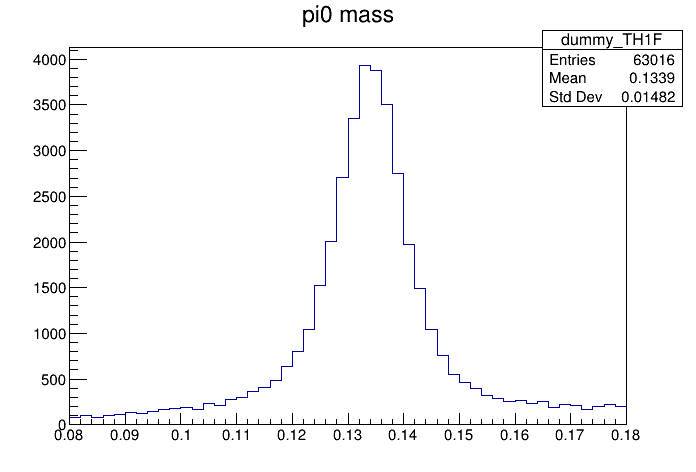

In [440]:
dummy_TH1F = apply_cuts(mychain, dummy_TH1F)
c1 = ROOT.TCanvas()
dummy_TH1F.Draw()
c1.Draw()

In [441]:
dummy_TH1F.GetEntries()

63016.0

In [442]:
scale_factor = 1
fitting_region = (0.08, 0.18)

x = ROOT.RooRealVar("M(D^{0})", "M(\gamma_{sig}\gamma_{ROE}) [GeV/c^{2}]", fitting_region[0], fitting_region[1], "")
# x.setBins(50)
l = ROOT.RooArgList(x)
signalhist = ROOT.RooDataHist("sighist", "sighist", l, dummy_TH1F, scale_factor)


In [443]:
mean = ROOT.RooRealVar("mean", "mean of gaussians", 0.135,0.12, 0.14)
sigma = ROOT.RooRealVar("sigma", "width of gaussians", 0.005,0.001,0.05)

sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 0.01,0.001,0.05)

c0 = ROOT.RooRealVar("c0", "c0",0.2, -1,1)
c1 = ROOT.RooRealVar("c1", "c0",0.2, -1,1)


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit' created with bounds [0.08,0.18]
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) constructing test statistic for sub-range named fit
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'NormalizationRangeForfit' created with bounds [0.08,0.18]
[#1] INFO:Eval -- RooRealVar::setRange(M(D^{0})) new range named 'fit_nll_model_sighist' created with bounds [0.08,0.18]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_sighist) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Info in <TCanvas::Print>: png file rho_1ab.png has been created


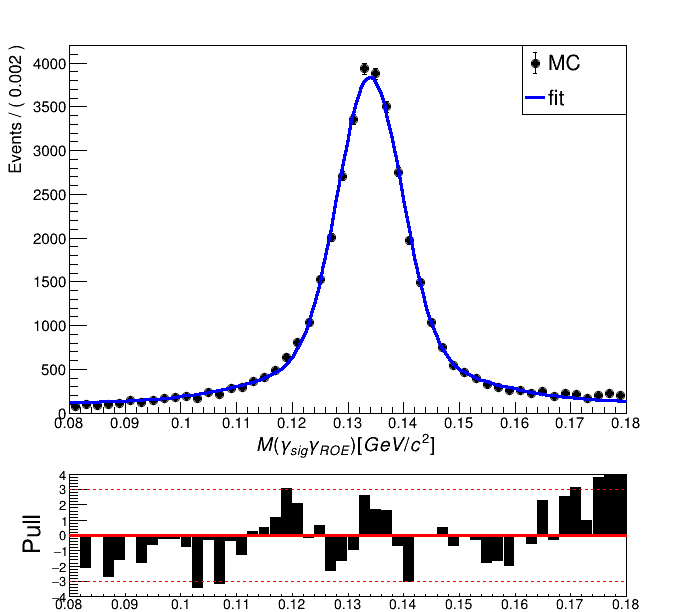

In [444]:
canv = ROOT.TCanvas("Canvas", "Canvas", 700, 640)
# canv = ROOT.TCanvas("Canvas", "Canvas", 700, 700)

xlow = ctypes.c_double()
ylow = ctypes.c_double()
xup = ctypes.c_double()
yup = ctypes.c_double()

canv.GetPad(0).GetPadPar(xlow, ylow, xup, yup)
canv.Divide(1,2)

xlow = xlow.value
ylow = ylow.value
xup = xup.value
yup = yup.value

upPad = canv.GetPad(1)
upPad.SetPad(xlow, ylow+0.25*(yup-ylow),xup,yup)

dwPad = canv.GetPad(2)
dwPad.SetPad(xlow, ylow,xup,ylow+0.25*(yup-ylow))

    
# model = ROOT.RooGaussian("model", "Signal component 1", x, mean, sigma)
# model = ROOT.RooBreitWigner("model", "Signal component 1", x, mean, sigma)

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma)
sig2 = ROOT.RooGaussian("sig2", "Signal component 1", x, mean, sigma2)

# sig1frac = ROOT.RooRealVar("sig1frac", "fraction of component 1 in signal", 0.5, 0.0, 1.0)
# sig1_model = ROOT.RooAddPdf("sig1_model", "model", [sig1, sig2], sig1frac)


bkg1 = ROOT.RooPolynomial("bkg1", "Signal component 1", x, ROOT.RooArgList(c0,c1), lowestOrder=2)

# sig_frac = ROOT.RooRealVar("sig_frac", "fraction of component 1 in signal", 0.8, 0.0, 1.0)

# model = ROOT.RooAddPdf("model", "model", [sig1_model, bkg1], sig_frac)


nsig1 = ROOT.RooRealVar("nsig1","# signal events",dummy_TH1F.GetEntries()*0.5,0,dummy_TH1F.GetEntries())
nsig2 = ROOT.RooRealVar("nsig2","# signal events",dummy_TH1F.GetEntries()*0.4,0,dummy_TH1F.GetEntries())
nbkg1 = ROOT.RooRealVar("nbkg1","# bkg events",dummy_TH1F.GetEntries()*0.1,0, dummy_TH1F.GetEntries())

model = ROOT.RooAddPdf("model", "x_model", ROOT.RooArgSet(sig1,sig2,bkg1), ROOT.RooArgSet(nsig1, nsig2, nbkg1))




r = model.fitTo(signalhist,NumCPU=12,Range=fitting_region,PrintLevel=-1, Save=1)

r.Print()
canv.cd(1) 
# frame = x.frame(Title="D^{0} #rightarrow #bar{K}^{*0} #pi^{0}")
frame = x.frame(Title=" ")

signalhist.plotOn(frame,Name = "data1", XErrorSize=0)

# model.plotOn(frame, Name="gauss1", Components=sig1, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="CB1", Components=sig2, LineStyle=ROOT.kDashed, LineColor=593)
# model.plotOn(frame, Name="gauss1", Components=bkg1, LineStyle=ROOT.kDashed, LineColor=593)

# sig.plotOn(frame, Name="Novo", Components=sig3, LineStyle=ROOT.kDashed, LineColor=593)

model.plotOn(frame, Name="fitting",)


# sig.paramOn(frame)
# frame.GetXaxis().SetTitleSize(0.047)
frame.GetXaxis().SetTitleSize(0.045)
frame.GetXaxis().CenterTitle(True)
frame.GetYaxis().SetTitleSize(0.04)
frame.GetYaxis().SetTitleOffset(1.2)
frame.Draw("PE")


leg1 = ROOT.TLegend(0.75, 0.75, 0.9, 0.9)
leg1.SetFillColor(ROOT.kWhite)
# leg1.SetHeader("The Legend title","C")
leg1.AddEntry("data1", "MC", "PE")
leg1.AddEntry("fitting", "fit", "l")
leg1.Draw()

hpull = frame.pullHist()
hpull.SetFillStyle(1001)
hpull.SetFillColor(1);
for i in range(0,hpull.GetN()):#(int i=0;i<hpull.GetN();++i): 
    hpull.SetPointError(i,0.0,0.0,0.0,0.0)
# pullplot = x.frame(Title(" "))
pullplot = x.frame()
pullplot.SetTitle("")
pullplot.addPlotable(hpull,"BE")
# pullplot.addPlotable(hpull,"PE")

pullplot.SetYTitle("Pull")
pullplot.GetXaxis().SetTitleSize(0)
pullplot.GetYaxis().SetTitleSize(0.17)
pullplot.GetYaxis().CenterTitle(True)
pullplot.GetYaxis().SetTitleOffset(0.2)
pullplot.SetMinimum(-4.)
pullplot.SetMaximum(4.)
pullplot.GetXaxis().SetLabelSize(0.1)
pullplot.GetYaxis().SetLabelSize(0.09)
canv.cd(2)
pullplot.Draw()

xmin1 = ctypes.c_double(fitting_region[0])
xmax1 = ctypes.c_double(fitting_region[1])
# xmin1 = 0.1
# xmax1 = 0.18
line = ROOT.TLine(xmin1,0.0,xmax1,0.0)
line1 = ROOT.TLine(xmin1,3.0,xmax1,3.0)
line2 = ROOT.TLine(xmin1,-3.0,xmax1,-3.0)

line.SetLineColor(ROOT.kRed)
line.SetLineWidth(3)
line1.SetLineColor(ROOT.kRed)
line2.SetLineColor(ROOT.kRed)
line1.SetLineStyle(2)
line2.SetLineStyle(2)
line.Draw("SAME")
line1.Draw("SAME")
line2.Draw("SAME")

canv.Update()

canv.Draw()
canv.SaveAs("rho_1ab.png")

f = ROOT.TFile("Massveto_Mgg_fitresult.root", "RECREATE")
r.Write("Massveto_Mgg_fitresult")
f.Close()


In [445]:
model.Print("t")

0x561ba3c81d20 RooAddPdf::model = 0.870541 [Auto,Dirty] 
  0x561ba2bb13c0/V- RooGaussian::sig1 = 0.785909 [Auto,Dirty] 
    0x561ba437eda0/V- RooRealVar::M(D^{0}) = 0.13
    0x561ba3a9a930/V- RooRealVar::mean = 0.133983 +/- 4.61796e-05
    0x561ba3ac8000/V- RooRealVar::sigma = 0.00573819 +/- 8.80963e-05
  0x561ba3dbadc0/V- RooRealVar::nsig1 = 23233.3 +/- 546.808
  0x561b99442130/V- RooGaussian::sig2 = 0.973504 [Auto,Dirty] 
    0x561ba437eda0/V- RooRealVar::M(D^{0}) = 0.13
    0x561ba3a9a930/V- RooRealVar::mean = 0.133983 +/- 4.61796e-05
    0x561ba4445a80/V- RooRealVar::sigma2 = 0.0171872 +/- 0.000966905
  0x561ba4019260/V- RooRealVar::nsig2 = 10517.9 +/- 361.845
  0x561b94941f90/V- RooPolynomial::bkg1 = 1.0191 [Auto,Dirty] 
    0x561ba437eda0/V- RooRealVar::M(D^{0}) = 0.13
    0x561ba43de540/V- RooRealVar::c0 = 1 +/- 0.102582
    0x561ba441b030/V- RooRealVar::c1 = 1 +/- 1.23479
  0x561ba435b680/V- RooRealVar::nbkg1 = 5946.2 +/- 393.674


In [446]:
std1 = sigma.getValV()

In [447]:
std2 = sigma2.getValV()

In [448]:
Nsig1 = nsig1.getValV()

In [449]:
Nsig2 = nsig2.getValV()

In [450]:
combined_std = math.sqrt((Nsig1*std1**2 + Nsig2*std2**2)/(Nsig1 + Nsig2))

In [451]:
combined_std

0.01071081627032182

In [452]:
# phi : 0.010502495786316624

In [453]:
# rho : 0.01071081627032182

In [454]:
# antiKstar : 0.010870618705006484

In [455]:
# omega : 0.011559831242352688

In [456]:
# 1 sigma ~ 0.011

In [457]:
sigma.Print()

RooRealVar::sigma = 0.00573819 +/- 8.80963e-05  L(0.001 - 0.05) 
